In [1]:
#import modules
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
#import necessary modules that are included into the function
import shap
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import KFold, RepeatedKFold, LeaveOneOut, LeavePOut,ShuffleSplit
import itertools 
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
!pip install colorspacious
from colorspacious import cspace_converter

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


/kaggle/input/modellingdataset/ForModelling-Global-processed.csv


In [2]:
#import dataset
dataset = pd.read_csv(r"../input/modellingdataset/ForModelling-Global-processed.csv", sep=';')

In [3]:
#get rid off unnecessary variables

#unique identifier and geodata
dataset = dataset.drop(['Longitude', 'Latitude'], axis=1)
#also drop temporal NO2 variables
dataset = dataset.drop(['wkd_day_value', 'wnd_day_value', 'wkd_night_value', 'wnd_night_value'], axis=1)
#remove NA values
dataset = dataset.dropna(axis = 0, how ='any', thresh = None, subset = None, inplace=False)

In [5]:
##CREATE DEPENDENT- AND INDEPENDENT VARIABLES
#store all column names
all_column_names = dataset.columns

#create dataset with only predictor variables
x = dataset.drop(["mean_value_NO2"], axis=1)
#store column names of predictor variables
feature_names = x.columns
#dependent variable
y = dataset["mean_value_NO2"]
#verify if dependent variable is out of dataset
print(len(feature_names))

#transform dependent- and independent variables to numpy arrays for calculations
x = np.array(x)
y = np.array(y)

89


In [8]:
#CONSTRUCT FUNCTION - CV FEATURE IMPORTANCE (MEDIAN)

#set initial model
rf = RandomForestRegressor(n_estimators = 100, random_state = 42)

#generate function that creates K-fold CV, thereby creating shap summary plot for each loop/fold.

#split dataset into training- and testing dataset
X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size=0.25, random_state=42)

# Train the model on training data
rf.fit(X_train, Y_train)



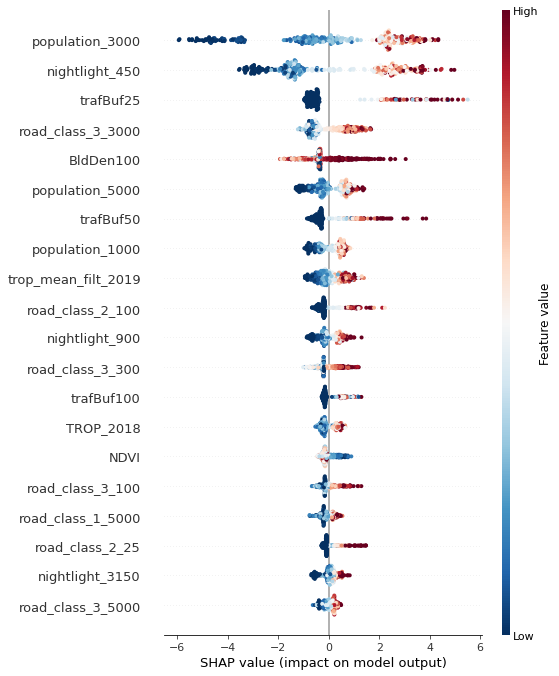

In [12]:
## == create shapley figure == ##

shap_values = shap.TreeExplainer(rf).shap_values(X_train)

#Define colormap
my_cmap = plt.get_cmap("RdBu_r")

shap.summary_plot(shap_values, X_train, feature_names=feature_names, show=False)

            
# Get the current figure and axes objects.
fig, ax = plt.gcf(), plt.gca()
#define font
plt.rcParams["font.family"] = "serif"

# Change the colormap of the artists
for fc in plt.gcf().get_children():
    for fcc in fc.get_children():
        if hasattr(fcc, "set_cmap"):
            fcc.set_cmap(my_cmap)

fig.savefig('Shapley_RdBu.jpg', bbox_inches='tight',
           facecolor=(1, 1, 1))

plt.show()